In [6]:
import pandas as pd
import numpy as np
import math

from Bio.KEGG.REST import kegg_info
from Bio.KEGG.REST import kegg_list
from Bio.KEGG.REST import kegg_link

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## Input data

In [7]:
dffig_pathway = pd.read_csv('Data/dffig_pathway', index_col=0, header=0, sep='\t')
dffig_ko = pd.read_csv('Data/dffig_ko', index_col=0, header=0, sep='\t')

In [8]:
dffig_pathway.replace('Sulfurovum', '$\it{Sulfurovum}$', inplace=True)
dffig_ko.replace('Sulfurovum', '$\it{Sulfurovum}$', inplace=True)

In [9]:
figures = ['All transcripts', 'Thiotrichales', 'Methylococcales', '$\it{Sulfurovum}$']
col = ['black','#ffc125', '#7b68ee', '#ff7f24']

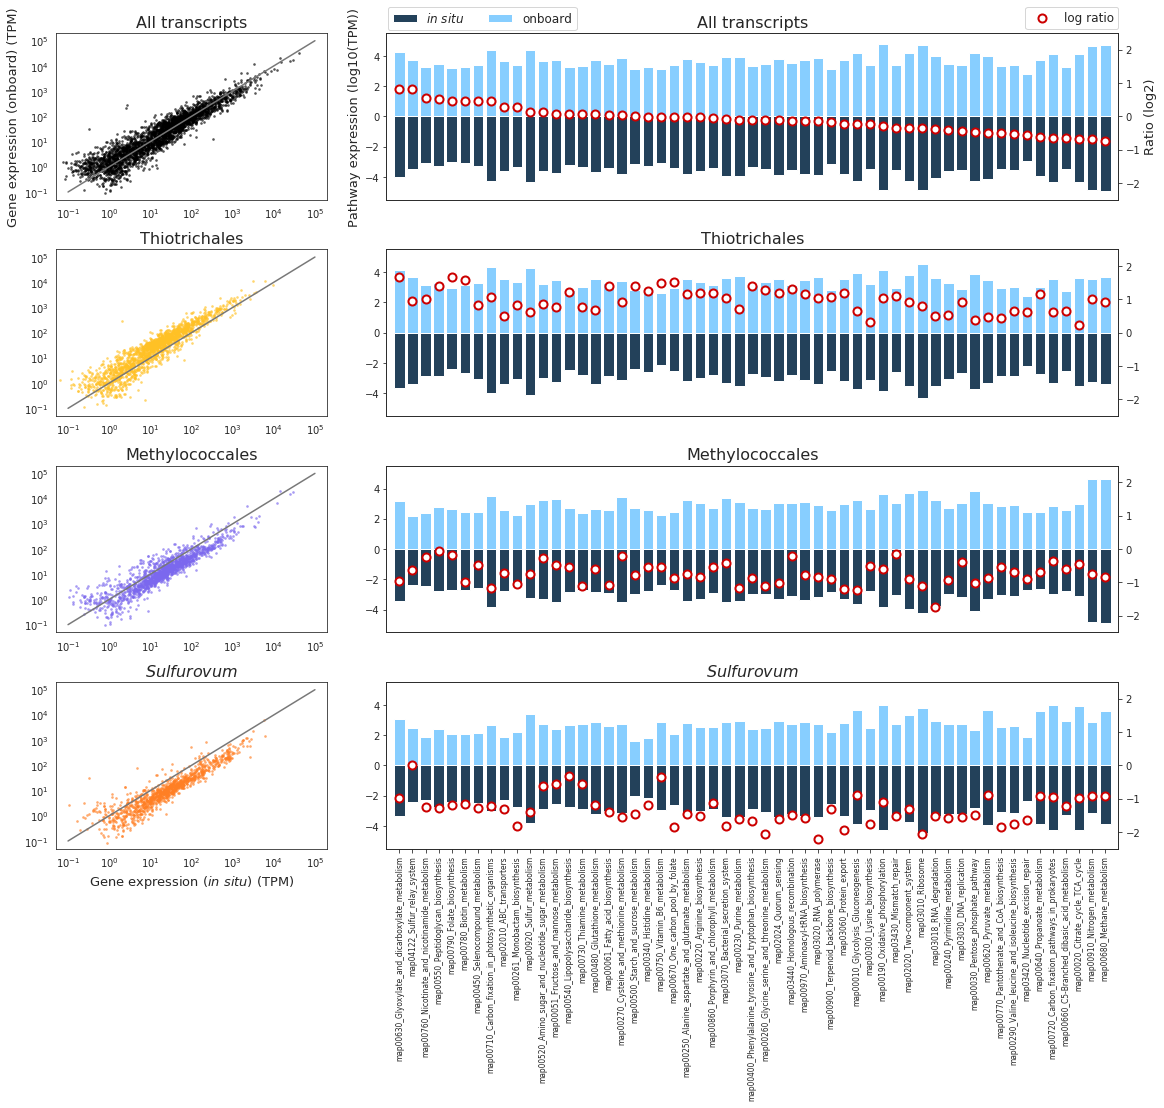

In [10]:
sns.set_style('white')
fig = plt.figure(figsize=(16.4, 15))

# Pathway
gs_pathway = gridspec.GridSpec(len(figures), 1)
gs_pathway.update(left=0.33, right=0.95)

for i in range(len(figures)):
    dftaxa = dffig_pathway[dffig_pathway['taxa'] == figures[i]]
    ax = plt.subplot(gs_pathway[i, :])
    
    # mRNA abundance of pathway
    x = dftaxa.index
    y_insitu = dftaxa['insitu_ave-log10']
    y_onboard = dftaxa['onboard_ave-log10']
    
    ax.bar(x, -y_insitu, color="#23415a", label='$\it{in}$ $\it{situ}$')
    ax.bar(x, +y_onboard, color="#87ceff", label='onboard')
    
    ax.set_title(figures[i], fontsize=16)
    ax.tick_params(axis='x', labelbottom=False, bottom=False, top=False)
    ax.set_ylim(-5.5,5.5)
    ax.set_xlim(-1,55)
    
    # ratios of TPM values obtained by both stabilization methods
    ratio = dftaxa['ratio']
    axR = ax.twinx()
    axR.scatter(x, -ratio, label='log ratio',linewidth=2,edgecolor='#cc0000', c='#ffffff', s=65)
    axR.set_ylim(-2.5,2.5)

    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = axR.get_legend_handles_labels()
    
    if i == 0:
        ax.set_ylabel("Pathway expression (log10(TPM))", fontsize=13)
        axR.set_ylabel("Ratio (log2)", fontsize=13)
    
ax.tick_params(axis='x', which='both', labelbottom=True, bottom=True, top=False)
ax.set_xticklabels(dffig_pathway['pathway_name'], rotation=90, fontsize=7.5)
plt.xlabel("KEGG pathway", fontsize=12)

ax.legend(bbox_to_anchor=(0.26, 5.06), loc='upper right', borderaxespad=0, fontsize=12, ncol=3)
axR.legend(bbox_to_anchor=(1, 5.06), loc='upper right', borderaxespad=0, fontsize=12, ncol=3)


# KO
gs_ko = gridspec.GridSpec(len(figures), 1)
gs_ko.update(left=0.05, right=0.28)

for j in range(len(figures)):
    dftaxa = dffig_ko[dffig_ko['taxa'] == figures[j]]
    ax = plt.subplot(gs_ko[j, :])
    
    x = dftaxa['insitu_ave']
    y = dftaxa['onboard_ave']
    
    ax.scatter(x, y, s=3, c=col[j], alpha=0.5)
    ax.plot([0.1, 100000], [0.1, 100000], c="#787878")  # x=y
    
    ax.set_xscale('log', nonposx='clip')  
    ax.set_yscale('log', nonposy='clip')
    ax.set_title(figures[j], fontsize=16)
    
    if j == 0:
        ax.set_ylabel("Gene expression (onboard) (TPM)", fontsize=13)

ax.set_xlabel("Gene expression ($\it{in}$ $\it{situ}$) (TPM)", fontsize=13)

plt.subplots_adjust(hspace=0.3)
plt.show()

fig.savefig('Figures/Fig4.pdf', bbox_inches='tight')